## Exercises: Data Visualizations in Python

We will be using [this dataset](https://www.kaggle.com/datasets/arnavvvvv/spotify-music/data) from Kaggle.

The dataset contains a comprehensive list of the most famous songs and most streamed songs as listed on Spotify. 

No need to dowload it, is is already in this directory under `Popular_Spotify_Songs.csv`

**For these exercises and the upcoming studio, we will be using the `matplotlib` library**

### Setting Up Your Data

Before you dive into data visualizations, you need to set up your dataframe and make sure that it is cleaned and ready to go.

You can use Excel to open the csv directly and acquant yourself with the data. Then based on what you see, you can make cleaning decisions. 

I have included my work below. Feel free to build on it as needed.

**To understand what a column represents in the dataset, you should google `Spotify [column name] data explanation`**

In [70]:
# import all librarys and modules needed
import pandas as pd
import numpy
import matplotlib.pyplot as plt

# We need to include an encoding tag with this dataset     ***
## Otherwise, we will get an error trying to read non-latin characters in the dataset   ***
df = pd.read_csv("./Popular_Spotify_Songs.csv", encoding='latin-1')



df.drop_duplicates()   # RETURNS DATAFRAME WITH DUPLICATE ROWS REMOVED  ***
df = pd.DataFrame(df)    # WHY CONVERT THE DF INTO DF AGAIN WITH PANDAS???

# The below command gets rid of one weird row of 'streams' data for a song.
## Using Excel or pandas, find what that value is and think why it would cause issues when trying
## to classify this column as 'numeric' data
# CONVERT INTO NUMERIC DATA 
# AND ERRORS = 'COERCE' WILL SET ANY INVALID PARSING TO NaN 
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')


# We need to specifically convert these fields to be numeric, since they are imported
## by default as string data
df['in_apple_playlists'] = pd.to_numeric(df['in_apple_playlists'], errors='coerce')
df['in_spotify_playlists'] = pd.to_numeric(df['in_spotify_playlists'], errors='coerce')
df['in_deezer_playlists'] = pd.to_numeric(df['in_deezer_playlists'], errors='coerce')
df['bpm'] = pd.to_numeric(df['bpm'], errors='coerce')

# It'll be beneficial to have the column names of the data on hand
df.columns


Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')

### Creating Visualizations

Now that the data is ready, we will create a number of different visualizations.

We have included a graphic for `Abela's Chart Suggestions` below. 

It was used to determine the best chart type for the questions in this exercise.

![chart-suggestions.png](./Abelas-Chart-Selection-Diagram.jpg)

# Exercise Explanation

Each section of this file will be broken up by chart type.

For each chart type, we will provide you with a full data visualization example that answers a question for the Spotify dataset.

It will then be your turn to answer a different question with your own data visualization.

# Line Charts

#### Example - Single Line Chart

Question:

**What is the total number of streams for all songs, plotted over `release_year`?**

Text(0, 0.5, 'Total Streams (in billions)')

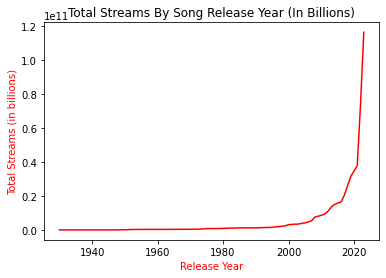

In [32]:
# Single line chart


# FIND THE UNIQUE RELEASE YEARS IN THE 'RELEASE_YEAR' COLUMN
# AND SORT THEM
years = numpy.sort(df["released_year"].unique()) 
# GROUP BY 'RELEASE_YEAR' 
# AND CALCULATE THE TOTAL STREAMS FOR EACH 'RELEASE_YEAR'
sum_by_year = numpy.sort(df.groupby("released_year")["streams"].sum())

# # converting to billions to make linechart easier to read
# for i in range(len(sum_by_year)):
# 	sum_by_year[i] = sum_by_year[i] / 1000000000

plt.plot(years, sum_by_year, 'red')
plt.title("Total Streams By Song Release Year (In Billions)")
plt.xlabel("Release Year", color='red')
plt.ylabel("Total Streams (in billions)", color='red')

#### Your Turn

Question:

**What is the total number of times all songs were added to a Spotify playlist, plotted over `release_year`?**

Text(0, 0.5, 'Times Song Added to Spotify Playlist (in billions)')

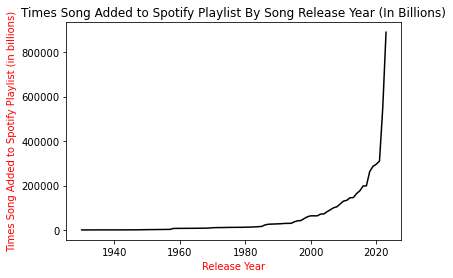

In [31]:
# Code Here
release_years = numpy.sort(df["released_year"].unique())
sum_in_spotify_playlists = numpy.sort(df.groupby("released_year")["in_spotify_playlists"].sum())

# # converting to billions to make linechart easier to read
# for i in range(len(sum_in_spotify_playlists)):
# 	sum_in_spotify_playlists[i] = sum_in_spotify_playlists[i] / 1000000000

plt.plot(years, sum_in_spotify_playlists, 'black')
plt.title("Times Song Added to Spotify Playlist By Song Release Year (In Billions)")
plt.xlabel("Release Year", color='red')
plt.ylabel("Times Song Added to Spotify Playlist (in billions)", color='red')

#### Example - Multi Line Chart

**For songs released after 2009, create a multi-line chart with two data variables**
1. Line showing total number of streams for songs with a `Major` mode, plotted by release year
2. Line showing total number of streams for songs with a `Minor` mode, plotted by release year

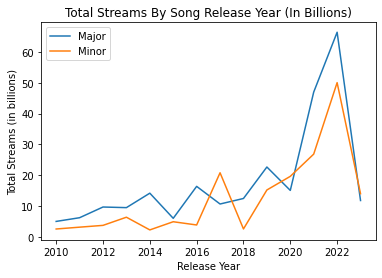

In [33]:
# Multi Line chart 
years = numpy.sort(df[df["released_year"] > 2008]["released_year"].unique())
streaming_sums = df.groupby("released_year")["streams"].sum()

major_list = []
minor_list = []

# in billions
for y in years:
	major = df.loc[(df["released_year"] == y) & (df["mode"] == "Major")]["streams"].sum() / 1000000000
	minor = df.loc[(df["released_year"] == y) & (df["mode"] == "Minor")]["streams"].sum() / 1000000000
	major_list.append(major)
	minor_list.append(minor)


plt.plot(years, major_list, label = "Major")
plt.plot(years, minor_list, label = "Minor")

plt.title("Total Streams By Song Release Year (In Billions)")
plt.xlabel("Release Year")
plt.ylabel("Total Streams (in billions)")
plt.legend()


#### Your Turn

**For songs released after 2009, create a multi line chart with three data variables**
1. Line showing total times all songs were added to a Spotify playlist, plotted by release year 
1. Line showing total times all songs were added to an Apple playlist, plotted by release year 
1. Line showing total times all songs were added to a Deezer playlist, plotted by release year 

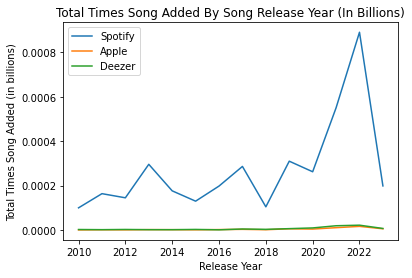

In [38]:
# Code Here
# Multi Line chart 

# get all the years over 2008
return_years_2009 = numpy.sort(df[df["released_year"] > 2008]["released_year"].unique())

# initialize list variables to hold the data that goes on the y axis of the graph
spotify_list = []
apple_list = []
deezer_list = []

# in billions
for yr in return_years_2009:
	spotify = df.loc[(df["released_year"] == yr)]["in_spotify_playlists"].sum() / 1000000000
	apple = df.loc[(df["released_year"] == yr)]["in_apple_playlists"].sum() / 1000000000
	deezer = df.loc[(df["released_year"] == yr)]["in_deezer_playlists"].sum() / 1000000000
	spotify_list.append(spotify)
	apple_list.append(apple)
	deezer_list.append(deezer)

plt.plot(return_years_2009, spotify_list, label = "Spotify")
plt.plot(return_years_2009, apple_list, label = "Apple")
plt.plot(return_years_2009, deezer_list, label = "Deezer")

plt.title("Total Times Song Added By Song Release Year (In Billions)")
plt.xlabel("Release Year")
plt.ylabel("Total Times Song Added (in billions)")
plt.legend()


# Bar Charts

#### Example - Vertical Bar Chart

Question:

**What is the total number of streams for 'Major' mode and 'Minor' mode songs in the dataset?**

Text(0, 0.5, 'Total Streams (in billions)')

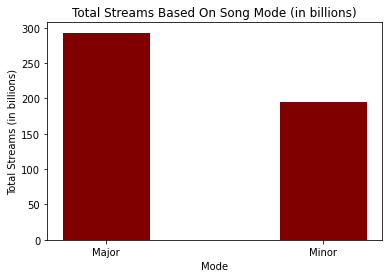

In [39]:
# find all the non null and unique values in the 'mode' column 
# and convert into list
keys = list(df[df["mode"].notnull()]["mode"].unique())
# initialize a list variable 
streams_by_mode = []

# in billions
# for every unique value in the 'mode' col, calculate the total no. of streams
# and divide by a billion
# and convert the sum to int data type
for k in keys:
	sum = int(df[df["mode"] == k]["streams"].sum() / 1000000000)
	streams_by_mode.append(sum)

plt.bar(x=keys, height=streams_by_mode,width=.4, color ='maroon')

plt.title("Total Streams Based On Song Mode (in billions)")
plt.xlabel("Mode")
plt.ylabel("Total Streams (in billions)")


#### Your Turn

Question:

**What is the total number of times all songs were `in_spotify_playlists`, `in_apple_playlists`, and `in_deezer_playlists`?**


Text(0, 0.5, 'Total Times Songs Added (in billions)')

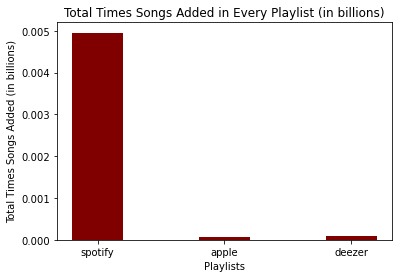

In [43]:
# Code Here

# total no of times all songs were in each of the playlists
songs_in_spotify = df['in_spotify_playlists'].sum() /1000000000
songs_in_apple = df['in_apple_playlists'].sum() /1000000000
songs_in_deezer = df['in_deezer_playlists'].sum() /1000000000

# create a list variable to hold values displayed by height on the y axis.
Times_songs_added = [songs_in_spotify, songs_in_apple, songs_in_deezer]

plt.bar(x=['spotify', 'apple', 'deezer'], height=Times_songs_added,width=.4, color ='maroon')

plt.title("Total Times Songs Added in Every Playlist (in billions)")
plt.xlabel("Playlists")
plt.ylabel("Total Times Songs Added (in billions)")




#### Example - Horizontal Bar Chart

Question:

**What is the total streams of all songs, organized by `artist_count`?**

Text(0.5, 0, 'Total Streams (in billions)')

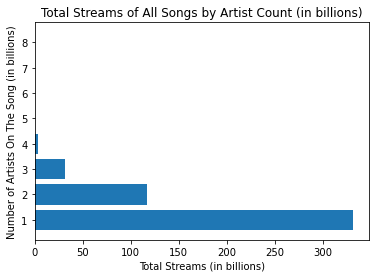

In [47]:
# Horizontal bar chart

# make a list of all the unique artist counts
keys = list(df[df["artist_count"].notnull()]["artist_count"].unique())

# create a list to hold the total streams for all the unique artist counts
streams_by_artist_count = []

# in billions
# for every unique artist count on a song, calculate the total streams of all songs
for k in keys:
	sum = int(df[df["artist_count"] == k]["streams"].sum() / 1000000000)
	streams_by_artist_count.append(sum)

plt.barh(keys, streams_by_artist_count, align='center')
plt.title("Total Streams of All Songs by Artist Count (in billions)")
plt.ylabel("Number of Artists On The Song")
plt.xlabel("Total Streams (in billions)")

#### Your Turn

Question:
**What is the total streams for all songs, organized by `key`?**

Text(0.5, 0, 'Total Streams (in billions)')

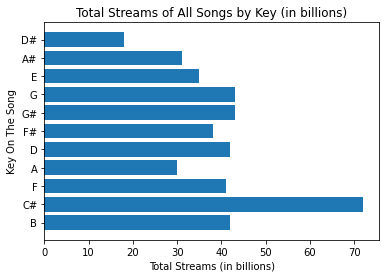

In [50]:
# Code Here

# make a list of all the unique keys in the 'key' col
kkeys = list(df[df['key'].notnull()]['key'].unique())

# create a list to hold the total streams for all the unique keys
streams_by_key = []

# in billions
# for every unique key, calculate the total streams of all songs
for k in kkeys:
	sum = int(df[df["key"] == k]["streams"].sum() / 1000000000)
	streams_by_key.append(sum)

plt.barh(kkeys, streams_by_key, align='center')
plt.title("Total Streams of All Songs by Key (in billions)")
plt.ylabel("Key On The Song")
plt.xlabel("Total Streams (in billions)")


#### Example - Grouped Bar Chart


Question:

**For songs released between 2020 and 2022, what is the total streams of all songs organized by `mode`?**

<ipython-input-92-02f2a9e82b2e>:50: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x + width, years)


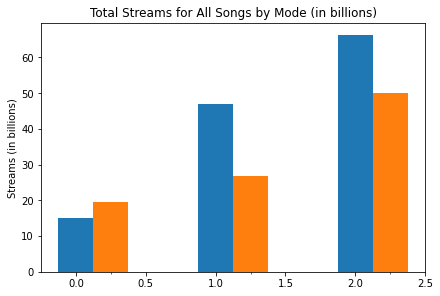

In [92]:
# Grouped bar chart

# get the list of unique values in mode column ()
keys = list(df[df["mode"].notnull()]["mode"].unique())

#get the data for the release years 2020 and 2022
data = df.loc[(df["released_year"] > 2019) & (df["released_year"] < 2023)]

# Setup for Bar Chart:
years = [2020, 2021, 2022]
x = numpy.arange(len(years)) # Creates an array [0, 1, 2]
width = .25 # Width of each bar
multiplier = 0 # Used for offsetting bars

# Initialize Plot:
# Initializes the figure and axes for the plot, using a constrained layout to prevent overlaps.
fig, ax = plt.subplots(constrained_layout=True)

# Aggregate Streams Data:
# Initializes a dictionary key_streams to store the total streams for each mode per year.
key_streams = {}

# For each mode (k), it loops through the specified years and calculates the total streams 
# for that mode in billions.
for k in keys:
	# For each mode (k), checks if the mode is already a key in the key_streams dictionary.
	if k not in key_streams:
		# If it isn’t, it initializes an empty list for that mode. This list will hold the total 
		# stream counts for the years of interest.
		key_streams[k] = []
	# for every year in [2020, 2021, 2022] calculate the total streams for this(k) mode in billions.
	for y in years:
		# in billions
		sum = data.loc[(data["mode"] == k) & (data["released_year"] == y)]["streams"].sum() / 1000000000
		key_streams[k].append(sum)

# Create Bar Chart:
# Loops through each mode(att) and its corresponding stream measurements(measurement).
for att, measurement in key_streams.items():
	# Calculates the offset for the x-axis to group the bars for each mode.
	offset = width * multiplier
	# Plots the bars on the axes using ax.bar(), with different offsets to create the grouped effect.
	rects = ax.bar(x + offset, measurement, width, label=att)
	# ax.bar_label(rects, padding=3)   --- throwing err
	multiplier += 1 

# Add Labels and Titles:
ax.set_ylabel('Streams (in billions)')
ax.set_title('Total Streams for All Songs by Mode (in billions)')
ax.set_xticks(x + width, years)
# ax.legend(loc='upper left', ncols=3)

plt.show()
	


#### Your Turn

Question:

**For songs released between 2020 and 2022, what is the total number of times all songs were `in_spotify_playlists`, `in_apple_playlists`, and `in_deezer_playlists`?**

<ipython-input-105-2cccdd3c5588>:51: MatplotlibDeprecationWarning: Passing the minor parameter of set_ticks() positionally is deprecated since Matplotlib 3.2; the parameter will become keyword-only two minor releases later.
  ax.set_xticks(x + width, years)


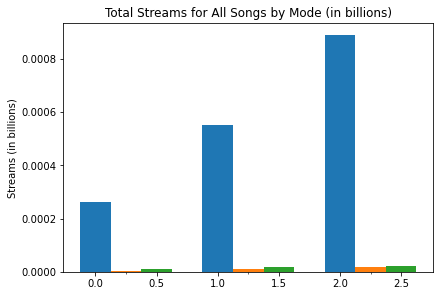

In [105]:
# Code Here

#get the data for the release years 2020 and 2022
data = df.loc[(df["released_year"] > 2019) & (df["released_year"] < 2023)]

# Setup for Bar Chart:
years = [2020, 2021, 2022]
x = numpy.arange(len(years)) # Creates an array [0, 1, 2]
width = .25 # Width of each bar
multiplier = 0 # Used for offsetting bars

# Initialize Plot:
# Initializes the figure and axes for the plot, using a constrained layout to prevent overlaps.
fig, ax = plt.subplots(constrained_layout=True)

# Aggregate Data:
# Initializes a dictionary to store the total songs in each playlist per year.
songs_in_playlists = {
     'spotify': [],
    'apple': [],
    'deezer': []
}


data.reset_index(drop=True, inplace=True)

# For each playlist, it loops through the specified years and calculates the total songs 
for y in years:
    sum_spotify = data.loc[data["released_year"] == y, 'in_spotify_playlists'].sum() / 1000000000
    songs_in_playlists['spotify'].append(sum_spotify)

    sum_apple = data.loc[data["released_year"] == y, 'in_apple_playlists'].sum() / 1000000000
    songs_in_playlists['apple'].append(sum_apple)

    sum_deezer = data.loc[data["released_year"] == y, 'in_deezer_playlists'].sum() / 1000000000
    songs_in_playlists['deezer'].append(sum_deezer)

# Create Bar Chart:
for playlist,sum_playlist in songs_in_playlists.items():
    # Calculates the offset for the x-axis to group the bars for each mode.
    offset = width * multiplier
    # Plots the bars on the axes using ax.bar(), with different offsets to create the grouped effect.
    rects = ax.bar(x + offset, sum_playlist, width, label=playlist)
	# ax.bar_label(rects, padding=3)   --- throwing err
    multiplier += 1 


# Add Labels and Titles:
ax.set_ylabel('Streams (in billions)')
ax.set_title('Total Streams for All Songs by Mode (in billions)')
ax.set_xticks(x + width, years)
# ax.legend(loc='upper left', ncols=3)

plt.show()





# Scatter Plot

#### Example - Scatter Plot

Question:
**For songs released between 2000 and 2009, what is the relationship between valence and energy for songs in the dataset?**

**Valence**: describes the musical positiveness conveyed by a track. 

Tracks with high valence sound more positive (happy, cheerful, euphoric), while tracks with low valence sound more negative (sad, depressed, angry).

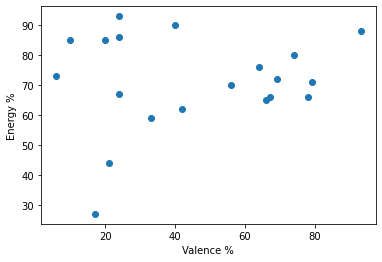

In [52]:
# scatter plot
# get all the data for when the release year is between 2000 and 2009
data = df.loc[(df["released_year"] > 1999) & (df["released_year"] < 2010)]

plt.scatter(x=data['valence_%'], y=data['energy_%'])
plt.xlabel('Valence %')
plt.ylabel('Energy %')
plt.show()

#### Your Turn

Question:

**For songs released between 2016 and 2019, what is the relationship between danceability and speechiness for songs in the dataset?**

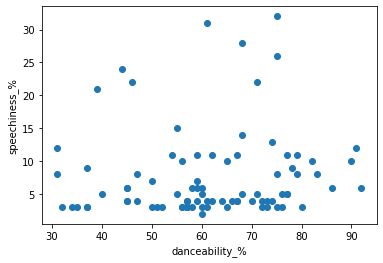

In [53]:
# Code Here
# scatter plot
# get all the data for when the release year is between 2016 and 2019
data = df.loc[(df["released_year"] > 2015) & (df["released_year"] < 2020)]

plt.scatter(x=data['danceability_%'], y=data['speechiness_%'])
plt.xlabel('danceability_%')
plt.ylabel('speechiness_%')
plt.show()


# Histogram

#### Example - Histogram

Question:

**Create a graph that groups all songs in the dataset based on their danceability percentage**

(array([  7.,  31.,  38.,  89., 122., 139., 202., 175.,  99.,  51.]),
 array([23. , 30.3, 37.6, 44.9, 52.2, 59.5, 66.8, 74.1, 81.4, 88.7, 96. ]),
 <BarContainer object of 10 artists>)

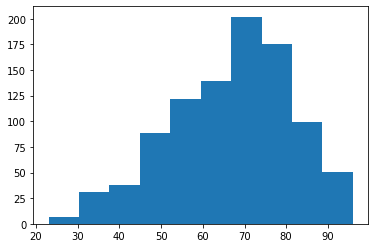

In [54]:
# histogram
plt.hist(df['danceability_%'])


#### Your Turn

Question:

**Create a graph that groups all songs in the dataset with over 1 billion streams by their bpm**

(array([ 4., 13., 22., 25., 28., 17., 17.,  8.,  8., 10.]),
 array([ 65. ,  77.1,  89.2, 101.3, 113.4, 125.5, 137.6, 149.7, 161.8,
        173.9, 186. ]),
 <BarContainer object of 10 artists>)

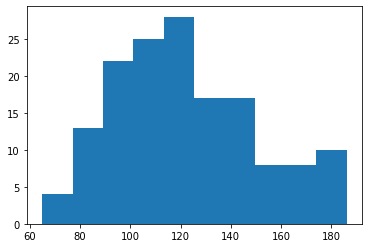

In [57]:
# Code Here
data = df[df['streams']>1000000000]
plt.hist(data['bpm'])

# Pie Chart

#### Example - Pie Chart

Question

**Of the Adele songs in the dateset, what is each song's portion of her total streams?**

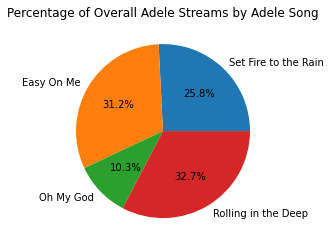

In [58]:
# pie chart
# get all data for Adele's songs by checking if all the strings in the column begin
# with 'Adele' and 'na=False' means missing values will be treated as if they don't start with 'Adele'
data = df.loc[(df['artist(s)_name'].str.startswith('Adele', na=False))]

plt.pie(data['streams'], labels=data['track_name'], autopct='%1.1f%%')
plt.title('Percentage of Overall Adele Streams by Adele Song')
plt.show()

#### Your Turn

Prompt:
**Breakdown the percentage of Dua Lipa's song streams based on `key`**

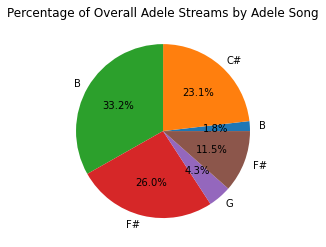

In [59]:
# Code Here
# get all data for Dua Lipa's songs by checking if all the strings in the column begin
# with 'Dua Lipa' and 'na=False' means missing values will be treated as if they don't start with 'Dua Lipa'
data = df.loc[df['artist(s)_name'].str.startswith('Dua Lipa', na=False)]

plt.pie(data['streams'], labels=data['key'], autopct='%1.1f%%')
plt.title('Percentage of Overall Dua Lipa Streams by Key')
plt.show()

# Bonus Missions

We wanted to make sure these exercises were approachable. To do so, we stuck to some pretty simple data analysis questions.

But, this is a very interesting dataset that could potentially answer deeper questions for these songs.

We are going to include a list of questions that would be interesting to answer with the dataset.

You can then do analysis and/or design visualizations to answer these questions.

1. For songs released between 1980 and 1989, chart the trend of the top song's (most streams for a song of that release year) danceability
2. For songs released between 1990 and 1999, chart the trend of the top song's (most streams for a song of that release year) valence
3. Find the `key` and `mode` combination that will most likely correlate with a top streaming song
4. Chart the relationship between valence and bpm for songs released in the 80s, 90s, and 2000s
5. Chart the relationship between a song's liveness and it's likelihood to be streamed more
6. What's the best day of the month to release a song on to get the most streams? 
7. For song's with a valence under 20%, which release month leads to the highest stream count?


#### Note from Christian:

Apologies for using the word 'leads' here, or any other language that implies 'causation' from a condition found in the data. 

# We should always remember that correlation != causation when doing analysis

In [ ]:
# Code here